# 주제

> 대한민국은 술을 얼마나 독하게 마시는 나라일까?

# 분석 결과

> 대부분 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받은 확률이 높음
> <br>
> 대륙 별로 상이하나 유럽의 맥주 소비량이 가장 높음
> <br>
> 술 소비량 대비 알코올 비율을 계산하여 국가별 차이 관찰
> <br>
> 대한민국은 세계에서 15번째로 술을 독하게 마시는 것으로 확인됨

# 상세 분석 과정

## 탐색 : 데이터 기초 정보 살펴보기

### drinks 데이터셋 기초 정보 출력

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('drinks.csv')
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**columns**
- country : 국가 정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 대륙 정보

In [3]:
# 수치형 데이터 통계 요약
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 인사이트 발견 : 탐색과 시각화

### 피쳐 간 상관 계수 구하기

In [5]:
# 피어슨 상관 계수 활용
corr = drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


### 상관 계수 시각화

In [6]:
!pip install seaborn

import seaborn as sns

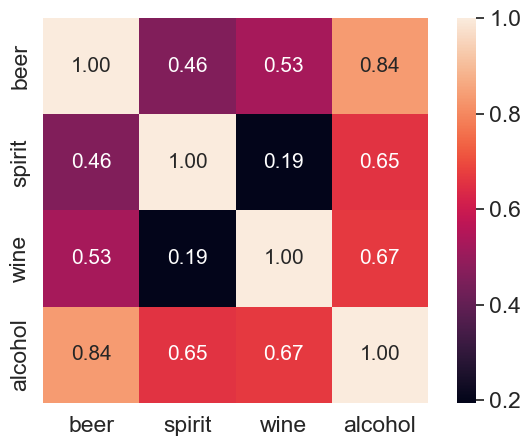

In [11]:
# 히트맵 시각화
cols_view = ['beer','spirit','wine','alcohol'] # 시각화를 위해 컬럼명 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

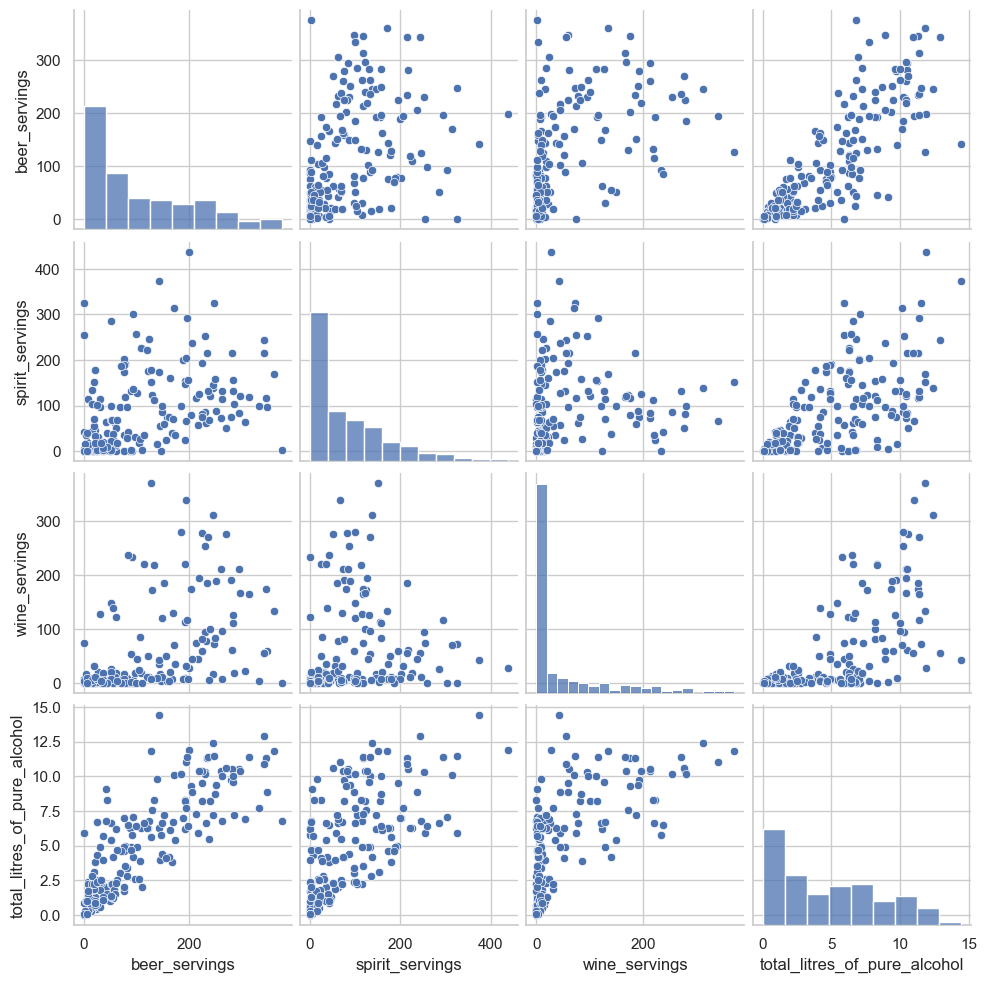

In [12]:
# 산점도 그래프 시각화
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

> total_litres_of_pure_alcohol 피쳐가 대체적으로 다른 피쳐와 상관 관계가 있으며
> <br>
> 특히 beer_servings 피쳐와의 상관관계가 0.84 로 높은 편이다.

## 탐색적 분석 : 개념적 탐색 분석하기

### 결측 데이터 전처리

In [17]:
# continent 컬럼의 NULL 값 기타 대륙으로 통합
drinks['continent'] = drinks['continent'].fillna(('OT')) # Others 의 약자 표기
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


### continent 별 시각화

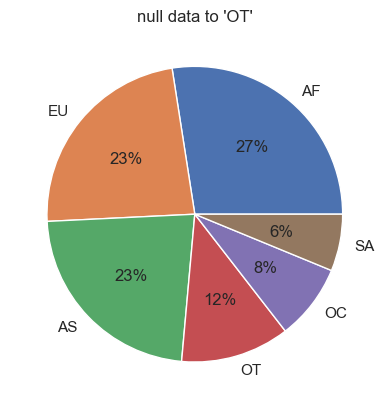

In [20]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()

plt.pie(fracs1, labels=labels, autopct='%.0f%%')
plt.title('null data to \'OT\'')
plt.show()

### continent 별 spirit_serving 의 평균, 최소, 최대, 합계 값 계산

In [23]:
results = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
results

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


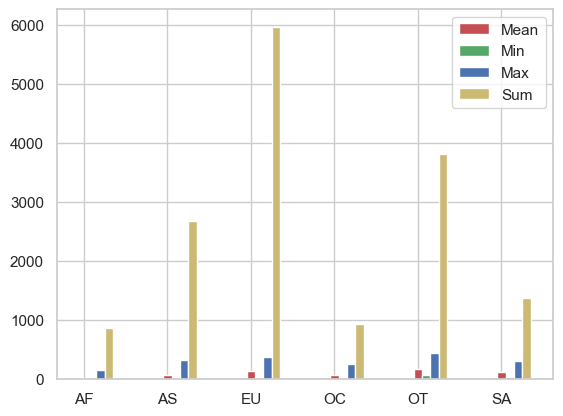

In [30]:
# 시각화
n_groups = len(results.index)
means = results['mean'].tolist()
mins = results['min'].tolist()
maxs = results['max'].tolist()
sums = results['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, results.index.tolist())
plt.legend()
plt.show()

### 전체 평균보다 많은 알코올을 섭취하는 대륙 찾기

In [27]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


> 유럽, 남아메리카, 기타 대륙이 평균 이상 알코올을 섭취함

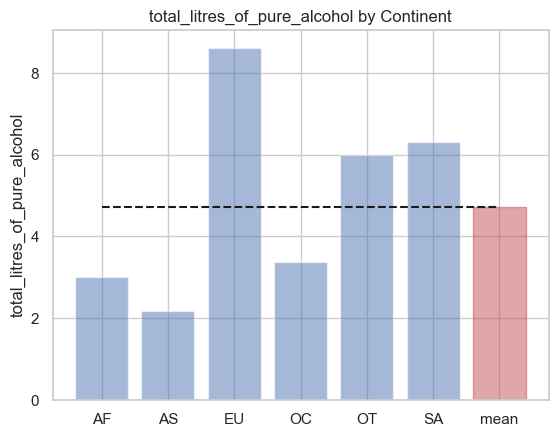

In [38]:
# 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

### 평균 beer_servings 가 가장 높은 대륙 찾기

In [25]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


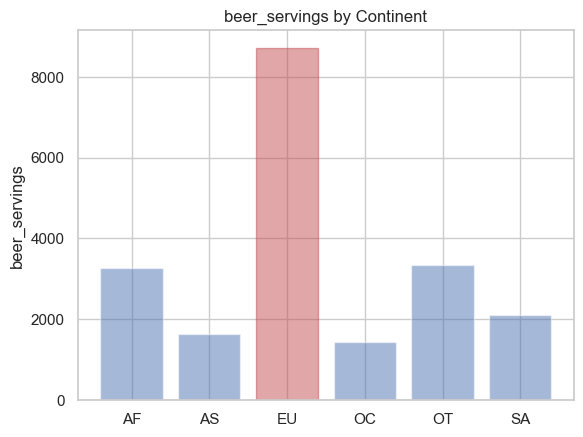

In [37]:
# 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

## 통계적 분석 : 분석 대상 간 통계적 차이 검정

### 아프리카와 유럽 간 맥주 소비량 차이 검정

In [40]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats

# 두 집단의 분산이 **같은** 경우
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

# 두 집단의 분산이 **다른** 경우
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." %tTestResult)
print("The t-statistic and p-value assuming not variances is %.3f and %.3f." %tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value assuming not variances is -7.144 and 0.000.


### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [41]:
# total_servings 컬럼 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 컬럼 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


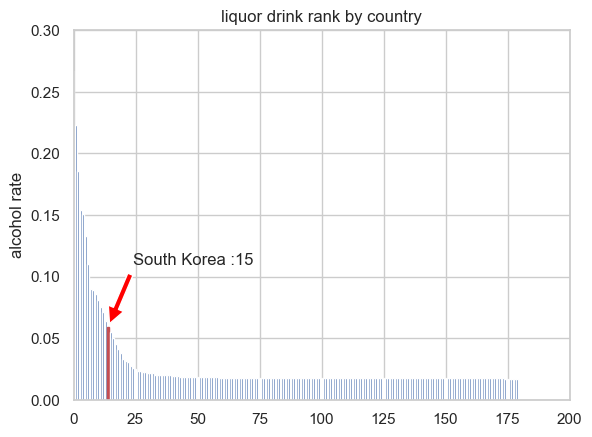

In [44]:
# 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea :' + str(korea_rank + 1),
                xy=(korea_rank, korea_alc_rate),
                xytext=(korea_rank+10, korea_alc_rate+0.05),
                arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()